<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/Hafta_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#. Gerekli kütüphanelerin çağırılması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#. Mizanpaj
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [8,6.75]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [26]:
#. Simülasyon
Atışlar = []

for i in range(10**4):
  #. Koleksiyon
  koleksiyon = []

  while len( set( koleksiyon ) ) < 11:
    #. Rassal değişken
    x = np.random.choice(
    [1,2,3,4,5,6],
    p = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21],
    size = 2
    )

    x = x.sum()
    koleksiyon.append(x)

  Atışlar.append(len(koleksiyon))

np.array( Atışlar ).mean()

469.323

In [27]:
#. Auto.csv dosyasını bir DataFrame olarak çağır

df = pd.read_csv( '/content/Auto.csv' )
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Text(0.5, 1.0, 'Ağırlık verisi histogramı')

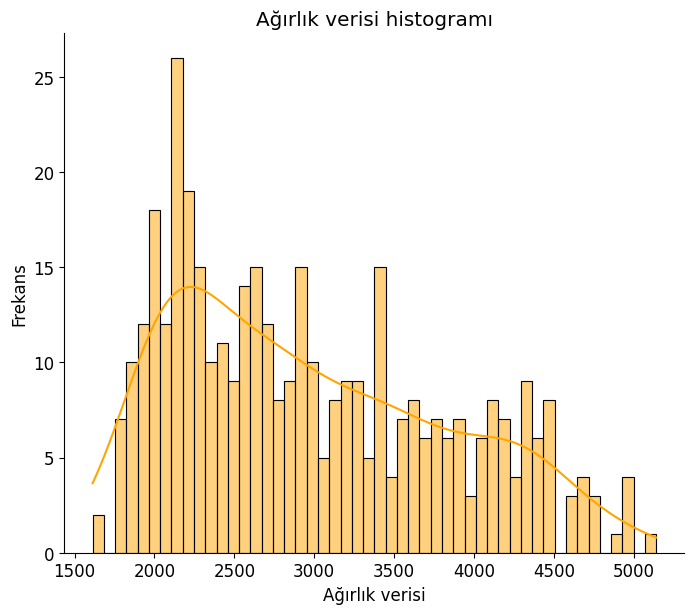

In [40]:
#. Ağırlığın tekil görselleştirimi

sns.histplot(
    df.weight,
    bins = 50,
    label = 'Ağırlık verisi',
    color = 'orange',
    kde = True #. sürekli veri ile çalışıyorum, dağılımın genel şeklini görmek istedim
    )

#. yatay ekseni yeniden adlandırıyorum: Ağırlık verisi
plt.xlabel( 'Ağırlık verisi' )

#. düşey ekseni yeniden adlandırıyorum: Frekans
plt.ylabel( 'Frekans' )

#. Figürüme bir başlık koyalım: Ağırlık verisi histogramı
plt.title( 'Ağırlık verisi histogramı' )

Text(0.5, 1.0, 'Ağırlık ve ivmelenme verisi karşılaştırması')

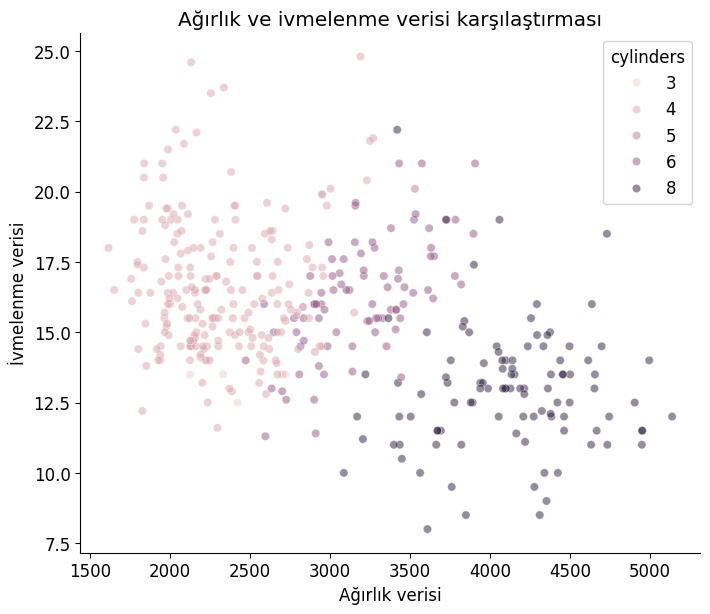

In [55]:
#. Araçların ağırlıkları ile ivmelenme verilerini karşılaştıralım

sns.scatterplot(
x = df.weight,
y = df.acceleration,
alpha = .5,
hue = df.cylinders,
)

plt.xlabel( 'Ağırlık verisi' )
plt.ylabel( 'İvmelenme verisi' )

plt.title( 'Ağırlık ve ivmelenme verisi karşılaştırması' )

In [57]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

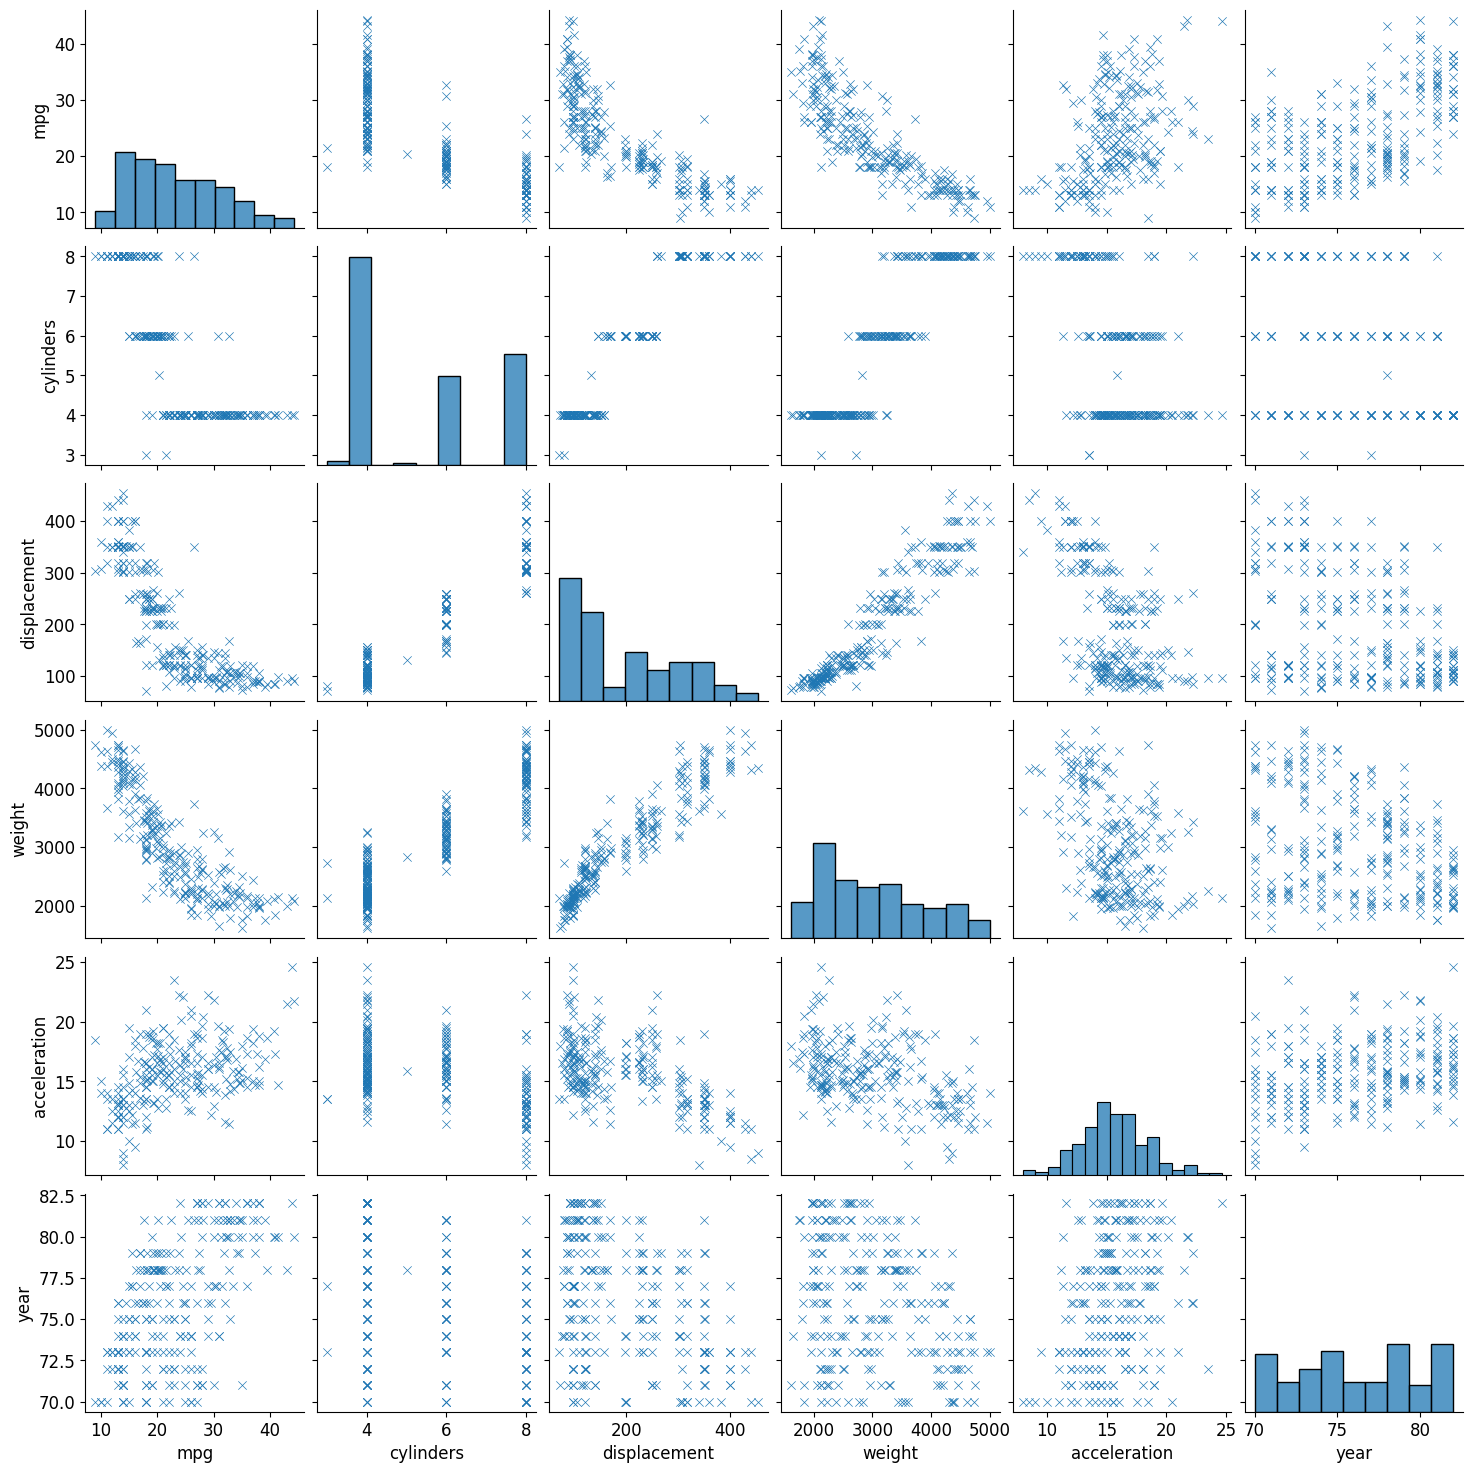

In [61]:
#. Tüm veri ikilileri görseli

sns.pairplot(
df[ ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year',] ].sample( frac = 250 / len(df) ),
# hue = df.origin,
markers = 'x'
)

In [63]:
#. sin( (x-2)**2 ) + 0.4x fonksiyonunu tanımlayalım

def a(x):
  return np.sin( (x-2)**2 ) + 0.4*x

<Axes: >

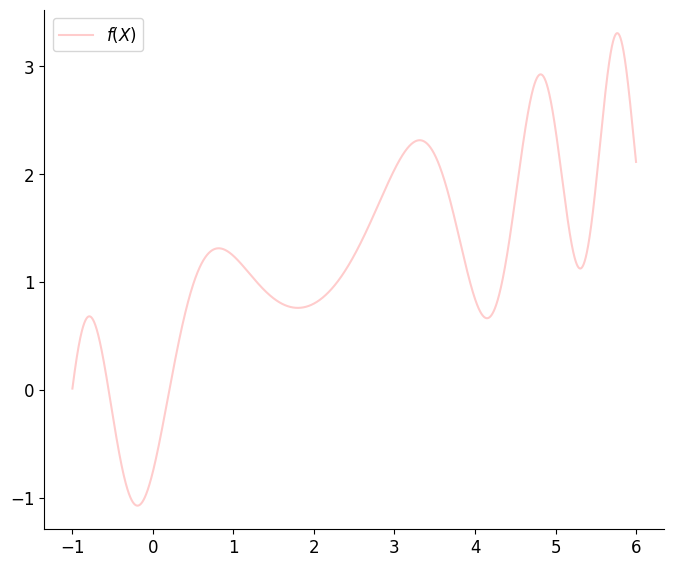

In [73]:
#. 10 birbirine eşit uzaklıkta nokta için görselleştiriyorum

X = np.linspace( -1, 6, 10**4 )

sns.lineplot(
x = X,
y = a(X),
color = 'red',
alpha = .2,
label = '$f(X)$'
)

<Axes: >

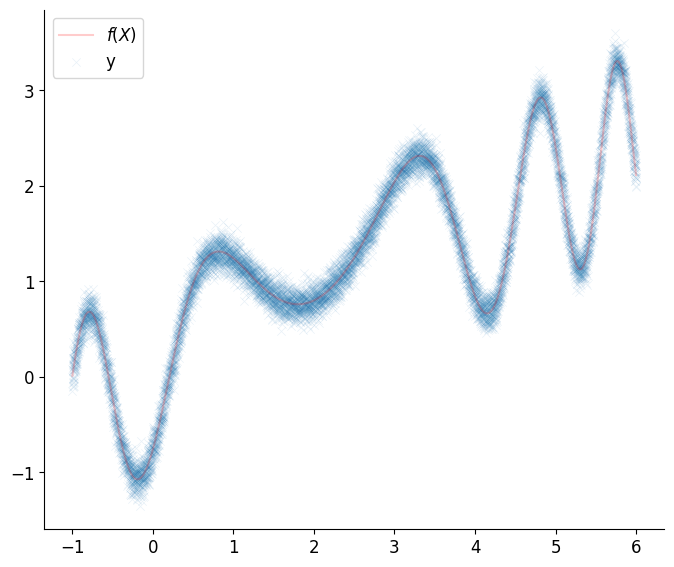

In [83]:
#. Regresyon fonksiyonu görseli
sns.lineplot(
            x = X,
            y = a(X),
            color = 'red',
            alpha = .2,
            label = '$f(X)$'
            )

#. Bu veriye gürültü ekleyelim
gürültü = np.random.normal( 0, .1, size = len(X) )

#. Bağımlı değişken yaratalım
y = a(X) + gürültü

#. Bağımlı değişkeni görselleştirelim
sns.scatterplot(
x = X,
y = y,
marker = 'x',
alpha = .1,
label = 'y'
)

In [86]:
#. scikit - learn kütüphanesinden doğrusal regresyon modelini çağıralım

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit( X.reshape(-1, 1), y, )

In [88]:
#. modelimi kullanmaya başlıyorum

y_kes = model.predict( X.reshape(-1, 1) )

<Axes: >

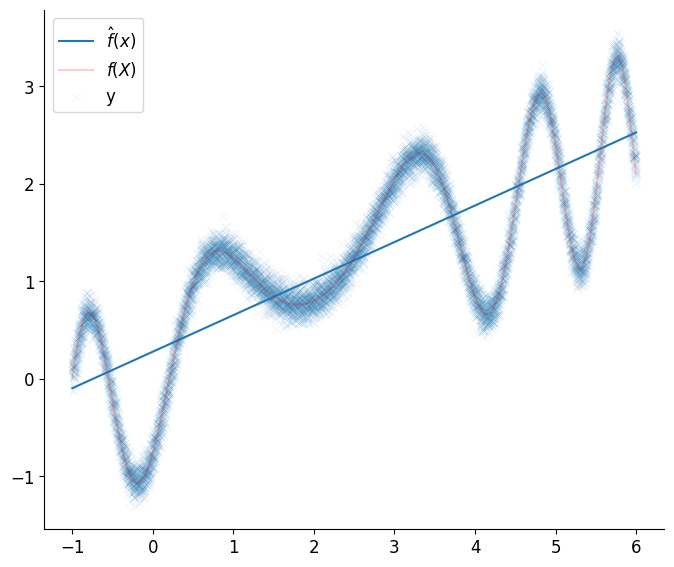

In [94]:
#. Modelin görselini oluşturalım

sns.lineplot(
x = X,
y = y_kes,
label = '$\hat f(x)$'
)


################################
#. ÖNCEKİ GÖRSELLER

#. Regresyon fonksiyonu görseli
sns.lineplot(
            x = X,
            y = a(X),
            color = 'red',
            alpha = .2,
            label = '$f(X)$'
            )

#. Bu veriye gürültü ekleyelim
gürültü = np.random.normal( 0, .1, size = len(X) )

#. Bağımlı değişken yaratalım
y = a(X) + gürültü

#. Bağımlı değişkeni görselleştirelim
sns.scatterplot(
x = X,
y = y,
marker = 'x',
alpha = .1,
label = 'y'
)